<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/17%EC%9E%A5%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 17 장 순환 신경망 RNN

문장의 학습 : 이전까지 학습했던 내용들과는 다르게 문장은 여러 개의 단어가 **정해진 순서대로 입력**되어야 한다.</br>다시 말해, 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 하는 문제가 생긴다.

이러한 유기성을 해결하기 위해 **순환 싱경망(Recurrent Neural Network, RNN)** 방법이 고안되었다.

순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때, 앞서 입력받은 데이터를 잠시 기억해 놓는 방법이다.

그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어간다.

## Long Short Term Memory (LSTM)

RNN이 처음 개발된 이후, RNN 결과를 개선하기 위해 발전된 방식들 중 LSTM이 널리 사용되었다.

이는 한 층 안에서 반복을 많이 해야 하는 RNN 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고, 이를 해결하기 어렵다는 단점을 보완한 방법이다.

즉, 반복되기 직전 다음 층으로 기억된 값을 넘길지 안 넘길지를 관리하는 단계를 하나 더 추가하는 것이다.


RNN 방식의 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 여러 가지 상황에서 적용할 수 있다.

1) 다수 입력 / 단일 출력 : 문장을 읽고 뜻을 파악

2) 단일 입력 / 다수 출력 : 사진 캡션 생성

3) 다수 입력 / 다수 출력 : 문장 번역

## LSTM 을 이용한 로이터 뉴스 카테고리 분류하기

keras에서 load_data()를 통하여 MNIST 데이터셋과 같이 RNN 학습에 적절한 텍스트 대용량 데이터 또한 받을 수 있다.

케라스가 제공하는 '로이터 뉴스 카테고리 분류'와 'IMDB 영화 리뷰'를 통해 RNN을 학습해 볼 것이다.

입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업이라고 할 수 있다.

예를 들어, "안녕. 오늘 날씨가 참 좋네"라는 말은 '인사'카테고리에 분류해야 한다.

이러한 긴 텍스트를 읽고 이 데이터가 어떤 의미를 지니는지를 카테고리로 분류하는 연습을 할 것이다.

**로이터 뉴스 데이터는, 총 11,258개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터이다.**

In [1]:
#로이터 뉴스 데이터셋 불러오기
import numpy as np
from keras.datasets import reuters

#데이터 분리

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=.2)

#데이터 확인
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [2]:
for i in range(20):
  print(X_train[i][:10])
print(Y_train[:30])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]
[1, 2, 699, 2, 2, 56, 2, 2, 9, 56]
[1, 53, 12, 284, 15, 14, 272, 26, 53, 959]
[1, 4, 686, 867, 558, 4, 37, 38, 309, 2]
[1, 2, 111, 8, 25, 166, 40, 638, 10, 436]
[1, 4, 37, 38, 309, 213, 349, 2, 48, 193]
[1, 56, 2, 925, 149, 8, 16, 23, 931, 2]
[1, 53, 648, 26, 14, 749, 26, 39, 2, 2]
[1, 178, 53, 321, 26, 14, 948, 26, 178, 39]
[1, 56, 2, 81, 40, 2, 174, 2, 6, 2]
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14]
[1, 56, 141, 2, 2, 149, 8, 16, 33, 223]
[1, 2, 81, 8, 16, 625, 42, 120, 7, 2]
[1, 248, 409, 166, 2, 2, 2, 8, 4, 495]
[1, 4, 113, 23, 133, 6, 433, 226, 7, 2]
[1, 577, 9, 355, 430, 21, 4, 2, 5, 4]
[1, 945, 65, 111, 8, 10, 498, 40, 85, 2]
[1, 486, 341, 785, 26, 14, 482, 26, 255, 606]
[1, 53, 19, 296, 15, 14, 258, 26, 53, 959]
[1, 2, 851, 260, 542, 159, 13, 52, 29, 23]
[ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21 11  4  4  3
  3  1  3  1  3 16]


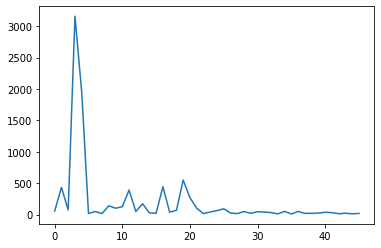

In [3]:
#히스토그램이 균등하게 나오지 않는 것이 확인된다.
import matplotlib.pyplot as plt
x = np.arange(47)
weight1 = Y_train
hist1, bins = np.histogram(weight1, x)

plt.plot(x[:-1], hist1)
plt.show()

그리고 학습 데이터를 보면 숫자 배열인 것이 확인 되는데 이 숫자는 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙인 것이다.

1, 2, 2, 8, ... 의 1은 아마 'A', 'The' 즘 되지 않을까 싶다. 그렇지만 2가 두 번 연속 나오는 것에 대해서는 중복된 단어라기 보다는 빈도수가 같은 단어라고 생각이 든다.

In [4]:
for i in range(8982):
  if(X_train[i][0]!=1):
    print(i)
    print(X_train[i][:10])

X_train 데이터의 모든 기사들의 첫 단어들이 모두 같은 단어임 또한 확인할 수 있다.

기사의 단어들 중 거의 사용되지 않는 것들도 있다.</br>이러한 빈도수가 낮은 모든 데이터들 까지 사용하는 것은 비효율적이므로 빈도가 높은 단어만 불러와 사용하기로 하였다.

이는 num_word=1000 이라는 인자를 통해 빈도가 1~1000에 해당하는 단어만 선택하여 불러오는 것이다.

또한 기사의 단어 수가 상이하므로 데이터 전처리 함수 sequence를 통해 숫자를 맞추어 줄 수 있다.

In [5]:
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils

#데이터 전처리
#100개 이상은 버리고 / 100개 이하일 때는 모자란 수 만큼 0으로 채운다.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
#모델 설정
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

LSTM 층에서 activation function 으로 tanh를 쓰는 이유
-


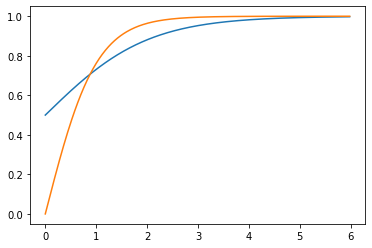

In [8]:
x = np.arange(0, 6, 0.02)

def sigmoid(x):
    return 1 / (1 +np.exp(-x))

sig = sigmoid(x)
tanh = np.tanh(x)

plt.plot(x, sig)
plt.plot(x, tanh)
plt.show()

In [ ]:
#모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#모델 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                    validation_data=(x_test, y_test))

```
Epoch 17/20
90/90 [==============================] - 1s 10ms/step - loss: 0.8953 - accuracy: 0.7707 - val_loss: 1.1784 - val_accuracy: 0.6977
Epoch 18/20
90/90 [==============================] - 1s 13ms/step - loss: 0.8560 - accuracy: 0.7807 - val_loss: 1.1920 - val_accuracy: 0.7044
Epoch 19/20
90/90 [==============================] - 1s 11ms/step - loss: 0.8178 - accuracy: 0.7905 - val_loss: 1.1907 - val_accuracy: 0.7097
Epoch 20/20
90/90 [==============================] - 1s 9ms/step - loss: 0.7835 - accuracy: 0.8038 - val_loss: 1.1922 - val_accuracy: 0.7128
```

71/71 [==============================] - 1s 7ms/step - loss: 1.1922 - accuracy: 0.7128

 Test Accuracy: 0.7128


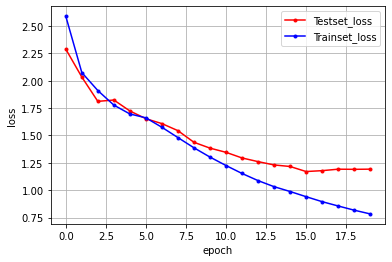

In [ ]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

#테스트셋 오차
y_vloss = history.history['val_loss']

#학습셋 오차
y_loss = history.history['loss']

#그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()